In [3]:
#K-Means on Dry Beans Dataset 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("Dry_Bean_Dataset.csv")

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [7]:
A = df.drop(columns = ['Class'])


In [8]:
A

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [9]:
B = df['Class']

In [10]:
B

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int8

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size = 0.25, random_state = 30)

In [13]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
12646,35214,711.303,269.692624,166.730630,1.617535,0.786001,35659,211.744793,0.718741,0.987521,0.874613,0.785134,0.007659,0.001795,0.616435,0.997105
12755,35731,695.011,258.955109,175.866360,1.472454,0.734010,36046,213.293512,0.765151,0.991261,0.929548,0.823670,0.007247,0.002058,0.678432,0.998960
6299,52268,905.317,381.487170,175.186845,2.177602,0.888322,52860,257.972255,0.807502,0.988801,0.801391,0.676228,0.007299,0.000941,0.457284,0.995783
11033,28929,637.003,245.240063,150.809112,1.626162,0.788570,29192,191.920678,0.812065,0.990991,0.895902,0.782583,0.008477,0.001961,0.612436,0.995920
13585,41863,763.785,281.596477,190.235643,1.480251,0.737304,42456,230.871451,0.736610,0.986033,0.901775,0.819866,0.006727,0.001875,0.672181,0.994996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13452,40223,738.399,276.857128,185.230424,1.494663,0.743220,40546,226.304031,0.729404,0.992034,0.927048,0.817404,0.006883,0.001895,0.668149,0.998657
500,36365,690.321,239.140901,193.834643,1.233737,0.585675,36680,215.177499,0.784303,0.991412,0.958940,0.899794,0.006576,0.002659,0.809629,0.998869
12077,32896,682.943,249.339369,168.168101,1.482679,0.738316,33349,204.657001,0.786384,0.986416,0.886307,0.820797,0.007580,0.002122,0.673708,0.998892
4517,72553,1029.989,389.247802,239.353282,1.626248,0.788595,73700,303.936422,0.784832,0.984437,0.859409,0.780830,0.005365,0.001230,0.609696,0.991516


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.61094696, -0.67320817, -0.58930834, ...,  0.13209842,
        -0.28048195,  0.46660999],
       [-0.5933224 , -0.74915777, -0.71449591, ...,  0.57325513,
         0.3488468 ,  0.8913065 ],
       [-0.02957519,  0.23124095,  0.71409257, ..., -1.30284838,
        -1.896018  ,  0.16373444],
       ...,
       [-0.6899677 , -0.80541604, -0.8266048 , ...,  0.68161897,
         0.30089041,  0.87587527],
       [ 0.66194155,  0.81243344,  0.80457296, ..., -0.81751045,
        -0.34889279, -0.81323181],
       [-0.16709446, -0.013917  ,  0.15628992, ..., -0.7024016 ,
        -0.93767392,  0.29063075]])

In [16]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-2.03638999e-01, -1.56982138e-01, -7.20703024e-02, ...,
        -3.26162007e-01, -3.57827281e-01, -4.07302622e-01],
       [-4.40939863e-01, -5.35541370e-01, -5.84171668e-01, ...,
         5.42584092e-01,  5.82408612e-01,  6.09680869e-01],
       [ 4.35713292e+00,  3.36908465e+00,  2.93035435e+00, ...,
        -1.25653424e+00,  6.20550395e-01,  4.77580740e-01],
       ...,
       [ 5.87862337e-02,  2.60479586e-01,  5.77022781e-01, ...,
        -1.06085173e+00, -1.35105491e+00,  1.76895281e-02],
       [ 2.91263575e-03,  2.02743534e-01,  4.49503372e-01, ...,
        -9.48512829e-01, -1.19455551e+00, -3.81489944e+00],
       [ 5.29569874e-01,  9.08358737e-01,  1.09225689e+00, ...,
        -1.25771920e+00, -1.35770328e+00,  5.15486965e-02]])

In [18]:
from sklearn.cluster import KMeans
wcss_list = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i, random_state = 2, init = 'k-means++', n_init = 'auto').fit(X_train_scaled, y_train)
    wcss_list.append(kmean.inertia_)

In [19]:
wcss_list

[163328.0,
 97062.9909052913,
 70760.38949649052,
 56956.242862891624,
 46127.368171382914,
 41394.17662354441,
 36315.13804156908,
 33598.24250108488,
 31926.06935472563,
 30581.311172488466]

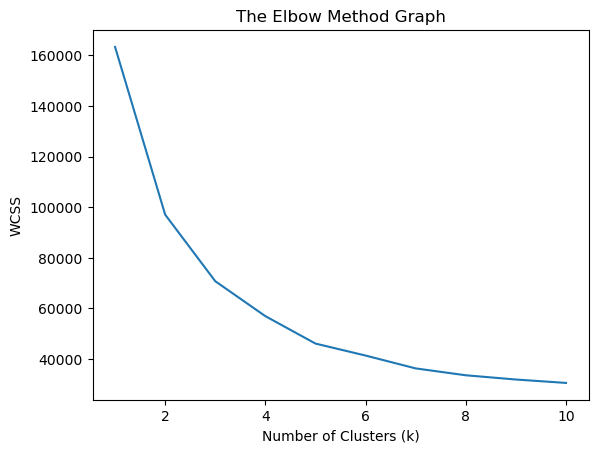

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmean = KMeans(n_clusters = 7, random_state = 7, init = 'k-means++', n_init = 'auto').fit(X_train_scaled, y_train)

In [22]:
test_prediction = kmean.predict(X_test_scaled)
test_prediction

array([3, 1, 5, ..., 2, 4, 2])

In [23]:
test_prediction.shape

(3403,)

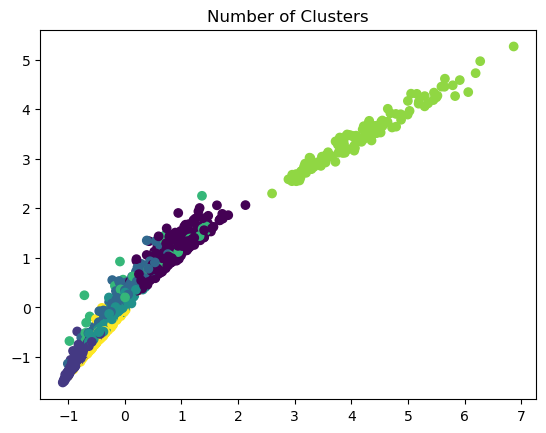

In [28]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c = test_prediction)
plt.title("Number of Clusters")
plt.show()

In [25]:
from sklearn.metrics import f1_score
f1_score(test_prediction, y_test, average= 'micro')

0.1413458712900382

In [26]:
kmean_label = kmean.labels_
kmean_label

array([3, 1, 2, ..., 1, 0, 3])

In [31]:
import pickle

In [27]:
centroids = kmean.cluster_centers_
centroids

array([[ 0.70780149,  0.94941391,  0.85715568,  0.8326486 ,  0.25826002,
         0.40245184,  0.71042302,  0.89223465,  0.1424106 , -0.44593875,
        -0.81174507, -0.3388518 , -1.05631077, -0.82064311, -0.35987082,
        -0.30921379],
       [-0.73253861, -0.91668438, -0.89332507, -0.82908466, -0.42596581,
        -0.19776748, -0.73337421, -0.89442186,  0.134768  ,  0.263372  ,
         0.6388588 ,  0.36266269,  1.08051882,  0.80773433,  0.33352814,
         0.45682579],
       [ 0.01657037,  0.29503185,  0.61736852, -0.42297459,  1.86034455,
         1.29797406,  0.01571272,  0.1257073 , -0.96600069, -0.03418238,
        -1.32680533, -1.64266977,  0.40983772, -1.13930149, -1.56845917,
        -0.34123808],
       [-0.29767752, -0.28742262, -0.25737422, -0.27908266, -0.03802649,
         0.19651904, -0.29931338, -0.26785637, -0.05547874,  0.17746368,
         0.15374481, -0.05596107,  0.18013412, -0.05710315, -0.08879711,
         0.15917001],
       [ 0.45817394,  0.73535148,  0

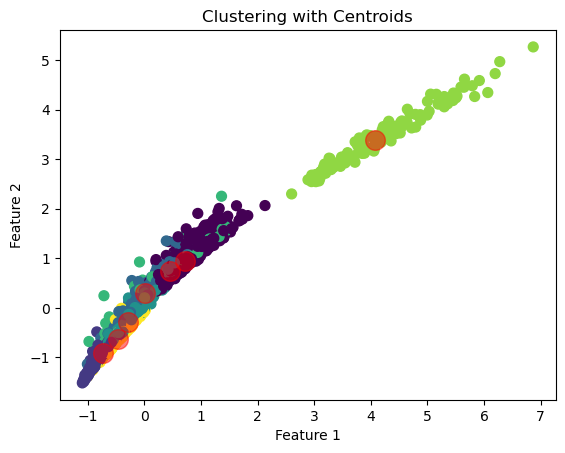

In [29]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_prediction, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, alpha=0.5)
plt.title('Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction)

array([[293,   0,   1,  29,  11,   0,   4],
       [  0,   0,   0,   0,   0, 123,   0],
       [303,   0,  10,   7,  49,   0,   1],
       [  0, 722,   5, 122,   5,   0,  25],
       [  7,   0, 449,  13,  49,   0,   0],
       [  0,  14,   0,  21,   2,   0, 470],
       [  1,  47,  12, 590,  11,   0,   7]], dtype=int64)

In [33]:
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmean, file)

In [34]:
with open('kmeans.pkl', 'rb') as file:
    km_loaded_model = pickle.load(file)

In [35]:
#K-Means on Dry Beans Dataset with pca
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dtf = pd.read_csv("Dry_Bean_Dataset.csv")

In [39]:
x = df.drop('Class', axis=1)

In [40]:
x.shape

(13611, 16)

In [41]:
from sklearn.decomposition import PCA
 
n_components = 2
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

In [42]:
df_pca1 = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1)
                        for i in range(n_components)])
print(df_pca1)

                PC1         PC2
0     -35149.923738  -22.086841
1     -34586.321890   58.586565
2     -33764.026291  -38.995373
3     -32586.564121  239.179424
4     -32712.806082  -71.439790
...             ...         ...
13606 -15707.436349  -99.766954
13607 -15714.623851 -112.800721
13608 -15634.515179  -87.239053
13609 -15559.055018  -24.031005
13610 -15598.314070  -78.240045

[13611 rows x 2 columns]


In [43]:
x_pca.shape

(13611, 2)

In [44]:
from sklearn.cluster import KMeans
wcss_list= []

C:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

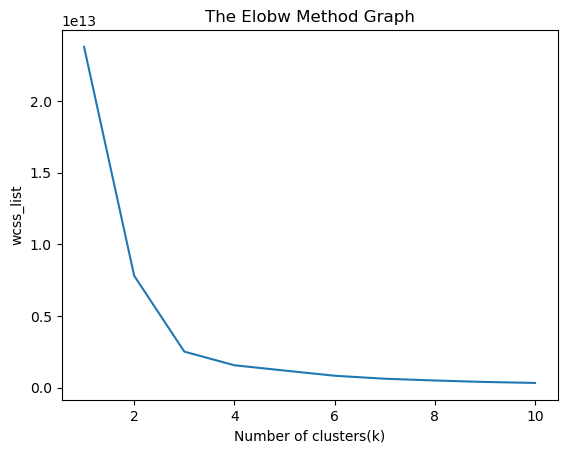

In [45]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit_transform(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x_pca)

C:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


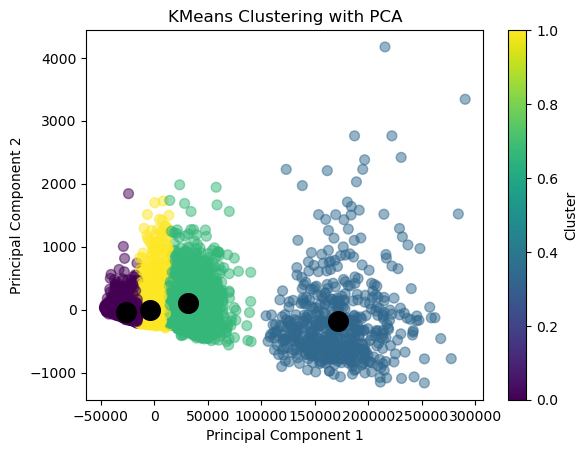

In [49]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200)
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [50]:
import pickle